## Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno




In [3]:
data=pd.read_csv("water_potability.csv")
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

Let's take a look at the top five rows: here we can see that for the column ph, Sulfate, Trihalomethanes there are some null values. All the values are numerical.

In [4]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Here in this table the null value are not considered.

In [6]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

d= pd.DataFrame(data['Potability'].value_counts())
fig = px.pie(d,values=d['count'],names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_green[3],colors_blue[3]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In these graphs, we can infer that pH, Hardness, Chloramines, Sulfate, and Organic Carbon follow a normal distribution. However, the others exhibit significant skewness and kurtosis, making it difficult to establish their normal distribution.

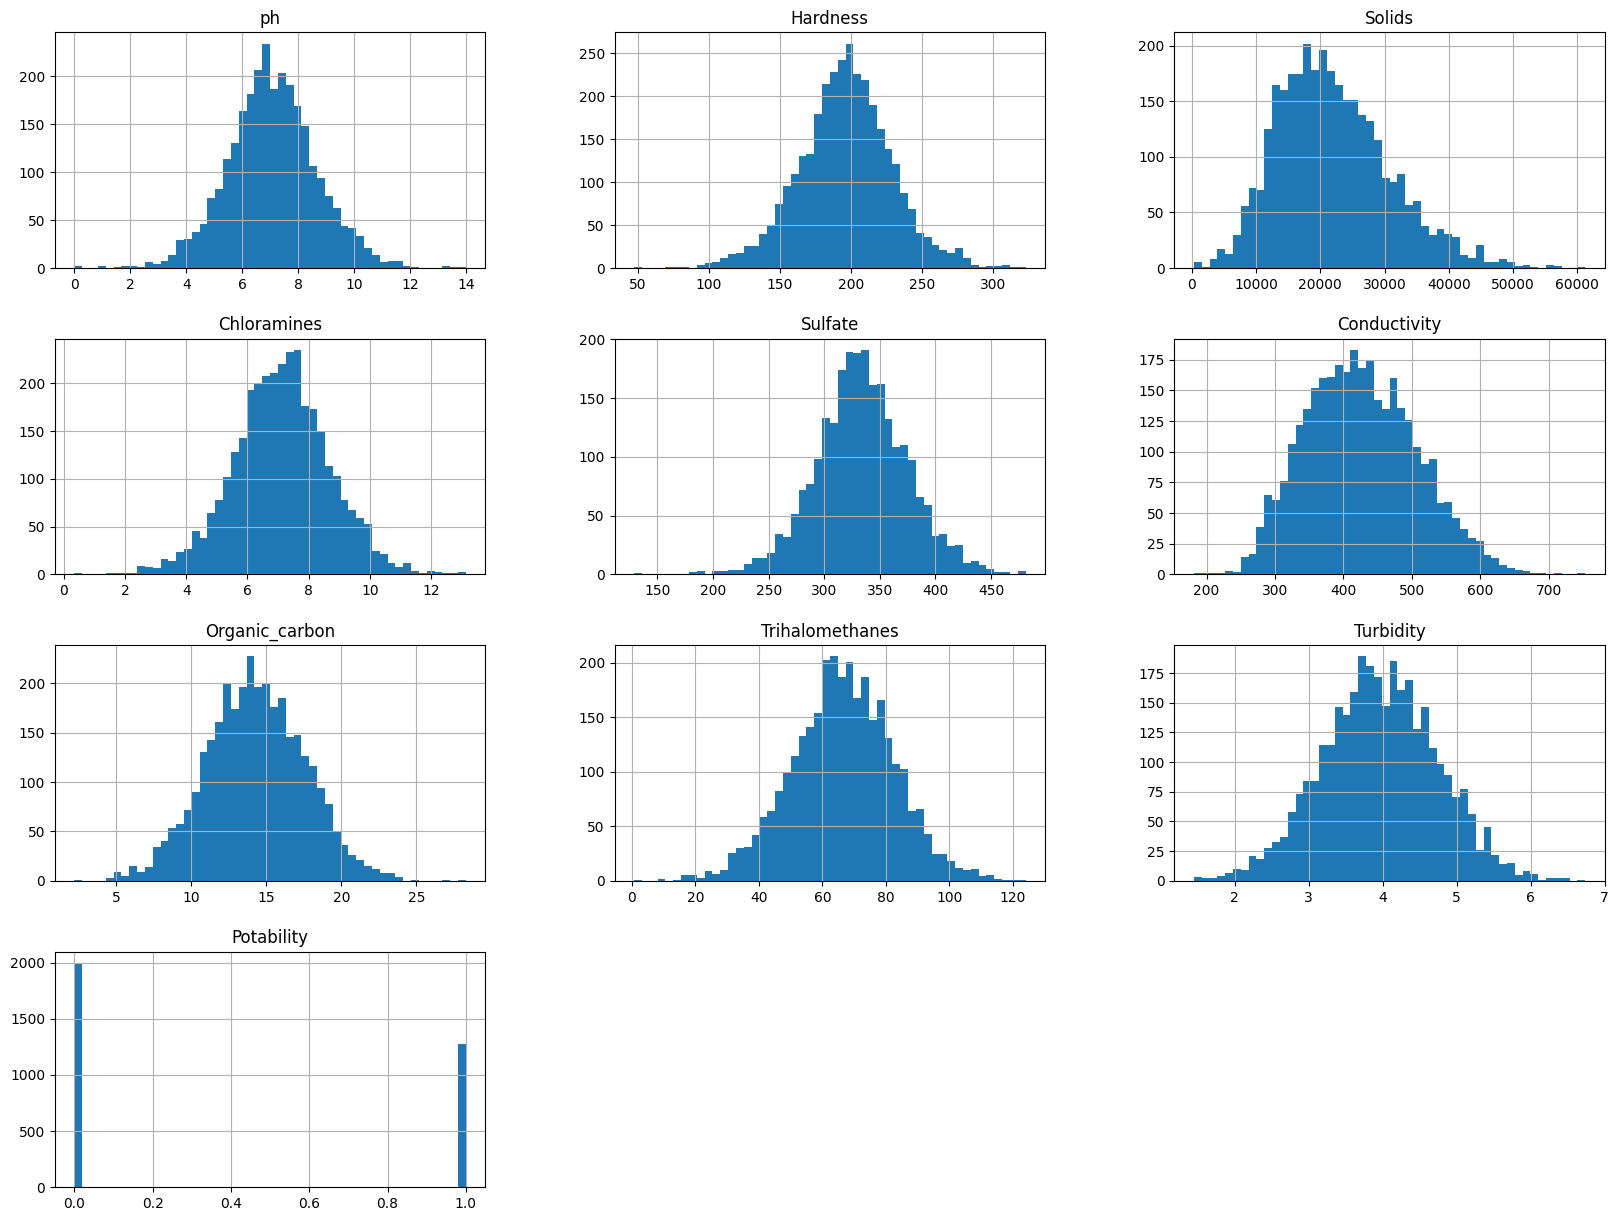

In [8]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix=data.corr()
corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [10]:
corr_matrix.style.background_gradient(cmap='coolwarm')

In [11]:
table = tabulate(data, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+
|      |         ph         |      Hardness      |       Solids       |    Chloramines     |      Sulfate       |    Conductivity    |   Organic_carbon   |  Trihalomethanes   |     Turbidity      | Potability |
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+
|  0   |        nan         | 204.8904554713363  | 20791.318980747023 | 7.300211873184757  | 368.51644134980336 | 564.3086541722439  |  10.3797830780847  |  86.9909704615088  | 2.9631353806316407 |    0.0     |
|  1   |  3.71608007538699  | 129.42292051494425 | 18630.057857970347 |   6.635245883862   |        nan         | 592.8853591348523  | 15.18001311635726  | 

After analyzing the data from a statistical perspective, we intend to carefully examine whether they respect the prescribed standards:
* $6.5 < $ ph $ < 8.5$
* Hardness $< 100$ mg/L
* Solids $< 1200$ mg/L
* Chloramines $< 4$ mg/L
* Sulfate $< 250$ mg/L
* Conductivity $< 400$ μS/cm
* Organic_carbon $<2$ mg/L
* Trihalomethanes $< 80$ ppm
* Turbidity $< 5.00$ NTU

!(I have to control better the standard for hardness)

Through this script, I tried to verify whether water classified as potable actually met the strict standards set by the WHO. However, the results obtained did not meet expectations. In each category, 40% of the water considered potable was actually non-potable. These cases all represent false positives.

In [12]:
for x in data.columns:
    if x =="ph":
        print(x)
        df_subset = data[((data[x] < 6.5) | (data[x] > 8.5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Hardness':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >100))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Solids':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >1200))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Chloramines':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >4))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Sulfate':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >250))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Conductivity':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >400))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Organic_carbon':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >2))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2)) 
    if x== 'Trihalomethanes':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >80))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Turbidity':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))

ph
Potability
0    64.45
1    35.55
Name: proportion, dtype: float64
----------------
Hardness
Potability
0    61.16
1    38.84
Name: proportion, dtype: float64
----------------
Solids
Potability
0    61.01
1    38.99
Name: proportion, dtype: float64
----------------
Chloramines
Potability
0    61.03
1    38.97
Name: proportion, dtype: float64
----------------
Sulfate
Potability
0    61.22
1    38.78
Name: proportion, dtype: float64
----------------
Conductivity
Potability
0    61.16
1    38.84
Name: proportion, dtype: float64
----------------
Organic_carbon
Potability
0    60.99
1    39.01
Name: proportion, dtype: float64
----------------
Trihalomethanes
Potability
0    60.47
1    39.53
Name: proportion, dtype: float64
----------------
Turbidity
Potability
0    62.74
1    37.26
Name: proportion, dtype: float64


In [24]:
df_subset = data[(((data['ph'] < 6.5) | (data['ph'] > 8.5) | (data['Hardness'] >100) | (data['Solids'] >1200)| (data['Chloramines'] >4)|(data['Sulfate'] >250)| (data['Conductivity'] >400)| (data['Organic_carbon'] >2) | (data['Trihalomethanes'] >80) | (data['Turbidity'] >5)) & (data['Potability']==1))]
df_subset

ph    Hardness        Solids  Chloramines     Sulfate  \
250   9.445130  145.805402  13168.529156     9.444471  310.583374   
251   9.024845  128.096691  19859.676476     8.016423  300.150377   
252        NaN  169.974849  23403.637304     8.519730         NaN   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
254   7.174135  203.408935  20401.102461     7.681806  287.085679   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
250     592.659021        8.606397        77.577460   3.875165           1  
251     451.143481       14.770863        73.778026   3.985251           1  
252     475.573562       12.924107        50.861913   2.747313           1  
253     376.456593       11.432466        73.777275   3.854940           1  
254     315.549900       14.533510        74.405616   3.939896           1  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[1278 rows x 10 columns]

In [29]:
print(len(df_subset)/len(data)*100)


39.010989010989015


# Link analysis

In [28]:
data = data.dropna(subset=['ph'])
data

ph    Hardness        Solids  Chloramines     Sulfate  \
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
5     5.584087  188.313324  28748.687739     7.544869  326.678363   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[2785 rows x 10 columns]

### Ph 0

Nodes:  2785
Edges:  704574


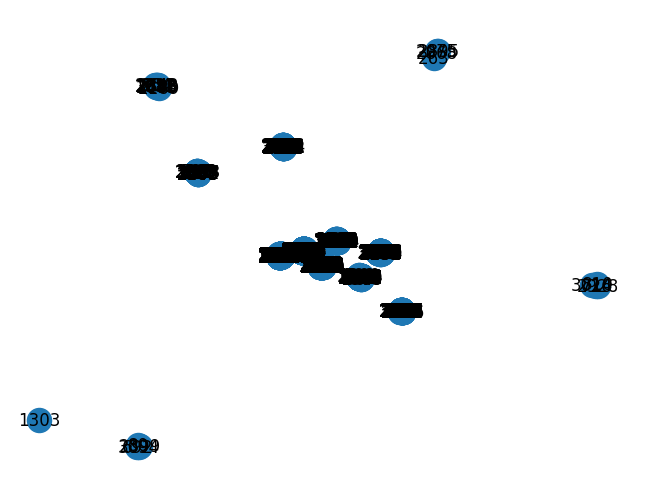

In [51]:
import pandas as pd
import networkx as nx
from scipy.spatial import distance

# Initialize the graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(data.index.tolist())
nx.set_node_attributes(G, data.to_dict('index'))

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        for x in range(0,14):
            if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                G.add_edge(i, j)

# Draw the graph
nx.draw(G, with_labels=True)
print("Nodes: ", G.number_of_nodes())
print("Edges: ", G.number_of_edges())

### PH 0

In [86]:
PH0 = nx.Graph()
x=0
# Add nodes to the graph
PH0.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH0, data.to_dict('index'))

#Remove nodes
for node in list(PH0.nodes()):
    if 'ph' in PH0.nodes[node] and (PH0.nodes[node]['ph'] < x or PH0.nodes[node]['ph'] >= x+1):
        PH0.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH0.add_edge(i, j)

Nodes:  4
Edges:  6


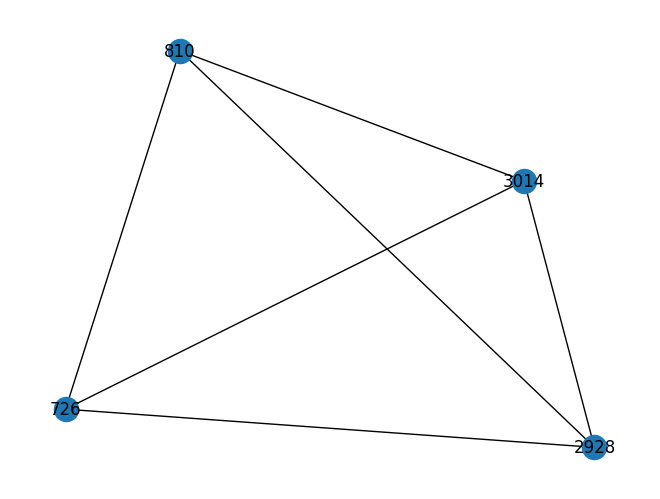

In [87]:
nx.draw(PH0, with_labels=True)
print("Nodes: ", PH0.number_of_nodes())
print("Edges: ", PH0.number_of_edges())

#### Description

In [234]:
x=0
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  4.000000    4.000000      4.000000     4.000000    3.000000   
mean   0.548247  180.449328  34138.287772     7.067226  353.915785   
std    0.510272   44.175689  13710.041502     2.512607   82.230486   
min    0.000000  133.216942  16922.853899     3.462492  283.693782   
25%    0.170624  147.701819  27589.546529     6.577311  308.685813   
50%    0.601539  183.688128  35086.855040     7.756561  333.677843   
75%    0.979162  216.435637  41635.596282     8.246476  389.026787   
max    0.989912  221.204114  49456.587108     9.293289  444.375731   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count      4.000000        4.000000         3.000000   4.000000     4.00000  
mean     446.970509       13.120076        61.204689   4.042295     0.50000  
std      106.846537        5.802572        17.094655   1.232627     0.57735  
min      322.291191        7.702328        43.578466   2.533996     0.00000  
25%      409.907371        9.748139        52.950588   3.292805     0.00000  
50%      441.070998       11.816010        62.322711   4.237291     0.50000  
75%      478.134136       15.187946        70.017801   4.986781     1.00000  
max      583.448849       21.145954        77.712891   5.160604     1.00000

### PH 1

In [101]:
PH1 = nx.Graph()
x=1
# Add nodes to the graph
PH1.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH1, data.to_dict('index'))

#Remove nodes
for node in list(PH1.nodes()):
    if 'ph' in PH1.nodes[node] and (PH1.nodes[node]['ph'] < x or PH1.nodes[node]['ph'] >= x+1):
        PH1.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH1.add_edge(i, j)

Nodes:  4
Edges:  6


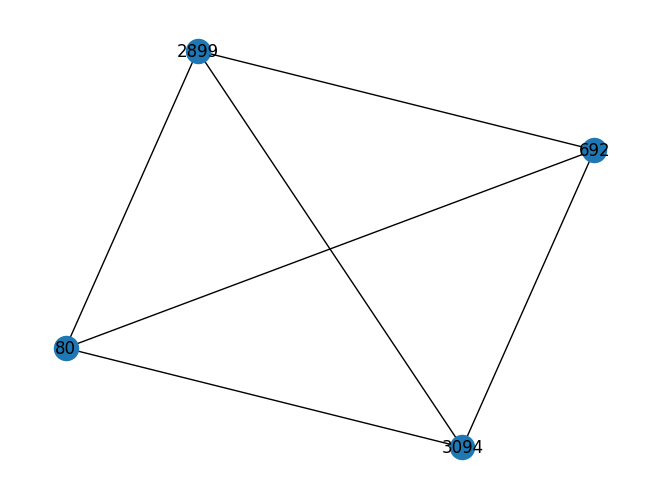

In [102]:
nx.draw(PH1, with_labels=True)
print("Nodes: ", PH1.number_of_nodes())
print("Edges: ", PH1.number_of_edges())

In [236]:
x=1
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  4.000000    4.000000      4.000000     4.000000    3.000000   
mean   1.754685  206.489145  26551.103476     7.109162  346.587109   
std    0.234924   39.925634  11928.357625     0.747707   28.227476   
min    1.431782  147.581831  12937.246891     6.214773  319.734136   
25%    1.675723  199.255476  20513.808102     6.630644  331.874196   
50%    1.800788  222.305204  25864.462142     7.246850  344.014256   
75%    1.879750  229.538873  31901.757516     7.725368  360.013595   
max    1.985383  233.764343  41538.242730     7.728177  376.012933   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count      4.000000        4.000000         4.000000   4.000000        4.00  
mean     418.822587       12.493034        64.794961   4.213138        0.25  
std       63.426922        2.136822        10.292912   0.968985        0.50  
min      341.078379       10.828696        54.299444   2.967554        0.00  
25%      393.060043       11.330852        59.430700   3.684208        0.00  
50%      419.416043       11.765790        63.073479   4.435768        0.00  
75%      445.178588       12.927973        68.437740   4.964698        0.25  
max      495.379883       15.611859        78.733441   5.013463        1.00

### PH 2

In [103]:
PH2 = nx.Graph()
x=2
# Add nodes to the graph
PH2.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH2, data.to_dict('index'))

#Remove nodes
for node in list(PH2.nodes()):
    if 'ph' in PH2.nodes[node] and (PH2.nodes[node]['ph'] < x or PH2.nodes[node]['ph'] >= x+1):
        PH2.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH2.add_edge(i, j)

Nodes:  12
Edges:  66


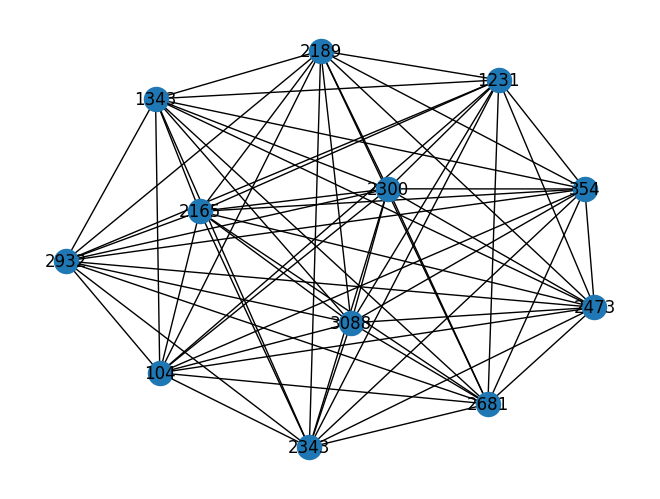

In [104]:
nx.draw(PH2, with_labels=True)
print("Nodes: ", PH2.number_of_nodes())
print("Edges: ", PH2.number_of_edges())

In [237]:
x=2
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  12.000000   12.000000     12.000000    12.000000    9.000000   
mean    2.660068  178.742542  25268.881191     7.303675  334.415732   
std     0.250434   59.553225  11204.123239     2.226594   51.997836   
min     2.128531  100.806520  11684.111637     2.498597  261.719960   
25%     2.553106  142.827499  17201.999949     6.298781  303.402078   
50%     2.651434  168.953415  23110.895625     7.393523  312.054239   
75%     2.833966  194.923138  31352.973198     8.767084  383.519892   
max     2.974429  311.383956  48204.172192    10.597395  418.000000   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count     12.000000       12.000000        12.000000  12.000000   12.000000  
mean     440.275954       12.798845        69.288800   3.894377    0.250000  
std       46.683554        2.544462        16.461190   0.912643    0.452267  
min      375.411470        8.741258        42.080353   2.779902    0.000000  
25%      405.589948       11.177943        54.641815   3.327478    0.000000  
50%      438.670324       12.984475        76.361882   3.670920    0.000000  
75%      469.447716       14.149575        80.609146   4.678827    0.250000  
max      521.140524       18.482185        87.697443   5.506934    1.000000

### PH 3

In [105]:
PH3 = nx.Graph()
x=3
# Add nodes to the graph
PH3.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH3, data.to_dict('index'))

#Remove nodes
for node in list(PH3.nodes()):
    if 'ph' in PH3.nodes[node] and (PH3.nodes[node]['ph'] < x or PH3.nodes[node]['ph'] >= x+1):
        PH3.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH3.add_edge(i, j)

Nodes:  58
Edges:  1653


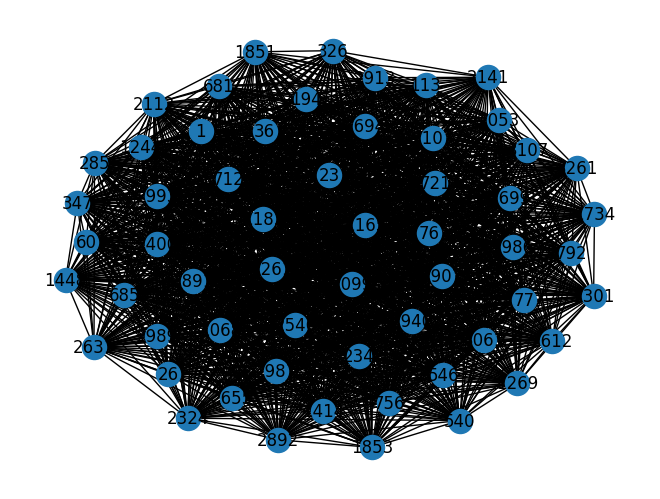

In [106]:
nx.draw(PH3, with_labels=True)
print("Nodes: ", PH3.number_of_nodes())
print("Edges: ", PH3.number_of_edges())

In [239]:
x=3
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  58.000000   58.000000     58.000000    58.000000   41.000000   
mean    3.671966  188.175028  24107.825548     7.209753  331.559654   
std     0.229467   39.434791  10123.710605     1.814345   34.147325   
min     3.102076  111.246412   7408.976196     0.530351  286.059556   
25%     3.523804  158.072503  17353.831579     6.345539  306.479558   
50%     3.715626  187.207235  22859.954009     7.160049  324.644080   
75%     3.846724  211.961010  27108.368104     8.145882  351.555482   
max     3.994498  323.124000  55334.702799    12.653362  418.559347   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count     58.000000       58.000000        53.000000  58.000000   58.000000  
mean     426.529429       14.063521        66.408204   4.043047    0.241379  
std       84.612164        3.649707        15.992069   0.777247    0.431657  
min      261.435215        7.637198        30.284597   2.353338    0.000000  
25%      366.936103       10.494976        55.947322   3.468730    0.000000  
50%      426.723947       13.867635        63.743064   3.934437    0.000000  
75%      467.079760       16.951638        77.360985   4.521556    0.000000  
max      660.254946       21.765170       112.061027   5.978054    1.000000

### PH 4

In [108]:
PH4 = nx.Graph()
x=4
# Add nodes to the graph
PH4.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH4, data.to_dict('index'))

#Remove nodes
for node in list(PH4.nodes()):
    if 'ph' in PH4.nodes[node] and (PH4.nodes[node]['ph'] < x or PH4.nodes[node]['ph'] >= x+1):
        PH4.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH4.add_edge(i, j)

Nodes:  168
Edges:  14028


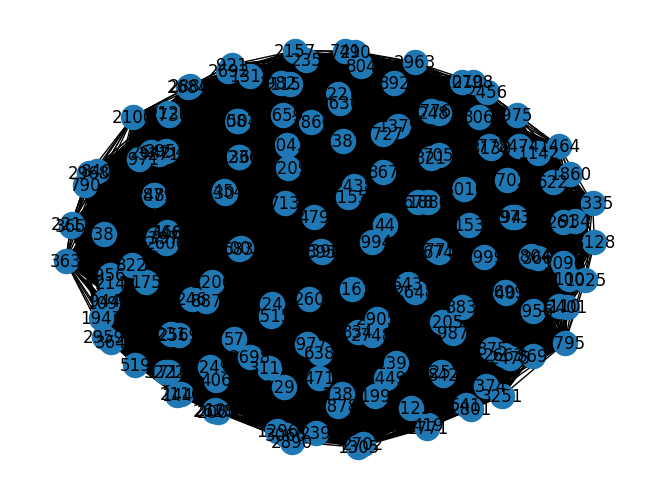

In [109]:
nx.draw(PH4, with_labels=True)
print("Nodes: ", PH4.number_of_nodes())
print("Edges: ", PH4.number_of_edges())

In [240]:
x=4
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  168.000000  168.000000    168.000000   168.000000  127.000000   
mean     4.588393  190.402544  23434.092337     7.236424  333.447293   
std      0.292748   40.945350   9404.668377     1.658465   44.550147   
min      4.004248  103.173587   5128.457646     1.920271  187.424131   
25%      4.316195  162.287167  15630.552994     6.237363  303.425799   
50%      4.667125  189.022497  22648.975355     7.397374  333.639511   
75%      4.852225  211.066668  28739.611766     8.309872  368.211852   
max      4.999414  308.253833  52318.917298    11.753904  426.157519   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    168.000000      168.000000       158.000000  168.000000  168.000000  
mean     423.069781       14.052008        67.146580    3.945815    0.357143  
std       82.113689        3.277949        14.946376    0.747715    0.480590  
min      260.566164        6.091227        22.749735    1.450000    0.000000  
25%      357.462077       11.680401        58.636649    3.451039    0.000000  
50%      415.785179       13.868956        67.726696    3.934888    0.000000  
75%      482.657232       16.274252        77.593515    4.449510    1.000000  
max      631.822078       23.108016       111.115310    5.952325    1.000000

### PH 5

In [110]:
PH5 = nx.Graph()
x=5
# Add nodes to the graph
PH5.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH5, data.to_dict('index'))

#Remove nodes
for node in list(PH5.nodes()):
    if 'ph' in PH5.nodes[node] and (PH5.nodes[node]['ph'] < x or PH5.nodes[node]['ph'] >= x+1):
        PH5.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH5.add_edge(i, j)

Nodes:  399
Edges:  79401


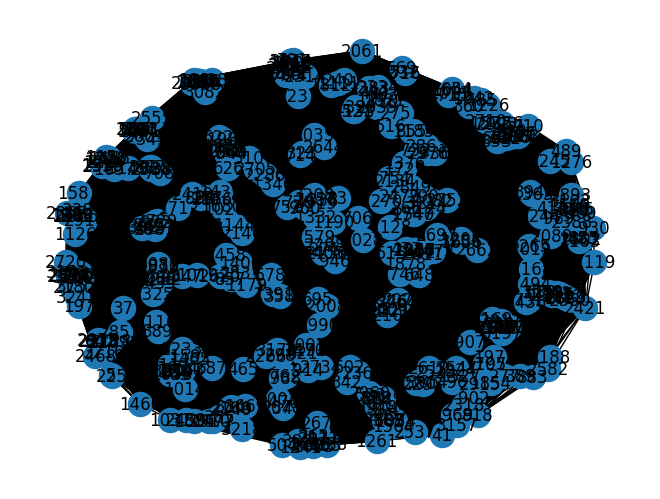

In [111]:
nx.draw(PH5, with_labels=True)
print("Nodes: ", PH5.number_of_nodes())
print("Edges: ", PH5.number_of_edges())

In [241]:
x=5
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  399.000000  399.000000    399.000000   399.000000  313.000000   
mean     5.553243  192.998177  22755.393860     7.141920  335.441401   
std      0.279778   33.077439   8967.478861     1.563781   43.346114   
min      5.006563  104.752425    728.750830     1.390871  180.206746   
25%      5.333062  172.182985  16287.199976     6.171523  311.794887   
50%      5.584124  190.431679  21293.889754     7.027226  331.559845   
75%      5.780876  212.358555  28102.501808     8.092678  364.483422   
max      5.999125  304.235912  56867.859236    13.043806  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    399.000000      399.000000       384.000000  399.000000  399.000000  
mean     429.369721       14.274410        65.971361    4.038950    0.385965  
std       81.805680        3.270664        15.553609    0.774098    0.487434  
min      252.968328        2.200000         8.577013    1.812529    0.000000  
25%      366.017875       12.107734        55.473139    3.596268    0.000000  
50%      427.664302       14.183025        66.010395    4.002082    0.000000  
75%      485.882574       16.430971        76.985173    4.545893    1.000000  
max      708.226364       24.755392       116.161622    6.494249    1.000000

### PH 6

In [112]:
PH6 = nx.Graph()
x=6
# Add nodes to the graph
PH6.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH6, data.to_dict('index'))

#Remove nodes
for node in list(PH6.nodes()):
    if 'ph' in PH6.nodes[node] and (PH6.nodes[node]['ph'] < x or PH6.nodes[node]['ph'] >= x+1):
        PH6.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH6.add_edge(i, j)

Nodes:  723
Edges:  261003


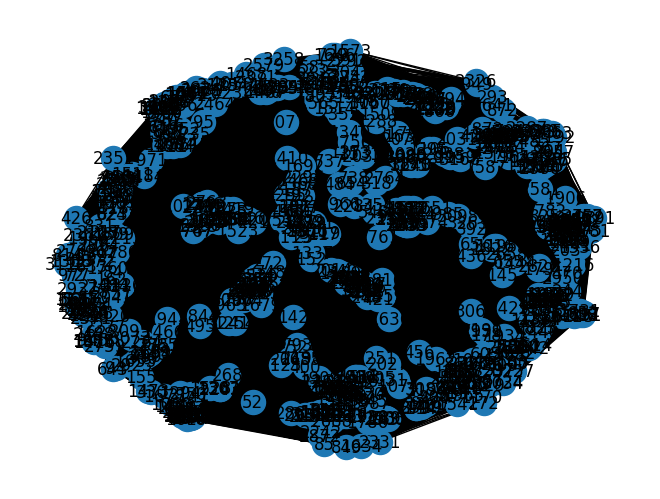

In [113]:
nx.draw(PH6, with_labels=True)
print("Nodes: ", PH6.number_of_nodes())
print("Edges: ", PH6.number_of_edges())

In [242]:
x=6
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  723.000000  723.000000    723.000000   723.000000  549.000000   
mean     6.534778  195.184811  21593.919182     7.146929  330.588956   
std      0.289384   28.810310   8136.448912     1.564293   39.069012   
min      6.000723   97.280909   1198.943699     2.397985  187.170714   
25%      6.283499  176.954553  15583.307828     6.176786  306.239180   
50%      6.559253  195.451482  20666.410142     7.092463  330.750392   
75%      6.784002  214.109158  26251.519232     8.117681  355.087258   
max      6.999765  306.627481  56320.586979    12.580026  441.587654   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    723.000000      723.000000       685.000000  723.000000  723.000000  
mean     422.595309       14.363945        66.269400    3.992602    0.420470  
std       81.095180        3.417836        16.635535    0.806443    0.493976  
min      181.483754        4.466772         8.175876    1.496101    0.000000  
25%      362.441722       11.994941        55.701067    3.443184    0.000000  
50%      418.419471       14.174063        66.225674    4.036720    0.000000  
75%      479.661846       16.647555        77.297300    4.566516    1.000000  
max      657.570422       27.006707       120.030077    6.307678    1.000000

### PH 7

In [114]:
PH7 = nx.Graph()
x=7
# Add nodes to the graph
PH7.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH7, data.to_dict('index'))

#Remove nodes
for node in list(PH7.nodes()):
    if 'ph' in PH7.nodes[node] and (PH7.nodes[node]['ph'] < x or PH7.nodes[node]['ph'] >= x+1):
        PH7.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH7.add_edge(i, j)

Nodes:  686
Edges:  234955


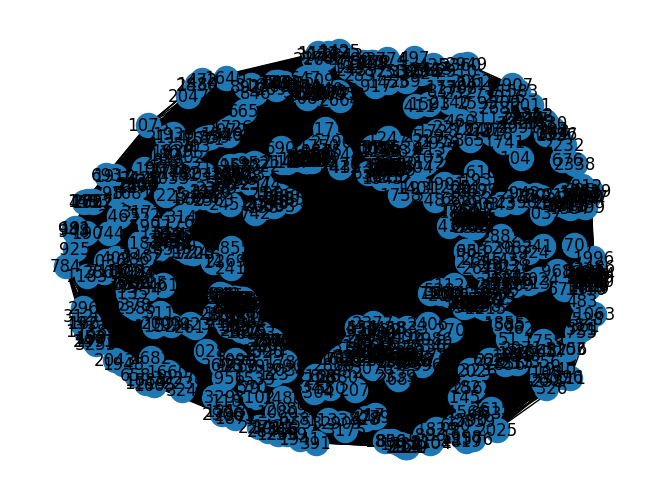

In [115]:
nx.draw(PH7, with_labels=True)
print("Nodes: ", PH7.number_of_nodes())
print("Edges: ", PH7.number_of_edges())

In [243]:
x=7
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  686.000000  686.000000    686.000000   686.000000  515.000000   
mean     7.498529  199.387799  22020.144564     7.158969  334.003648   
std      0.287678   28.011371   8173.043378     1.489575   41.500629   
min      7.000523   98.452931    320.942611     1.683993  217.000607   
25%      7.262787  181.813012  16134.030680     6.122273  304.791091   
50%      7.487177  199.665392  21353.016167     7.247598  334.777619   
75%      7.753496  216.661000  27181.809270     8.103209  360.303480   
max      7.998090  278.056321  51731.820553    11.224395  476.539717   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    686.000000      686.000000       660.000000  686.000000  686.000000  
mean     427.701134       14.276728        66.724519    3.974768    0.444606  
std       81.305072        3.289196        16.392310    0.778702    0.497285  
min      210.319182        4.371899         0.738000    1.492207    0.000000  
25%      364.231418       12.103252        56.788042    3.451419    0.000000  
50%      424.391497       14.396453        67.102193    3.933696    0.000000  
75%      484.743246       16.551517        78.222963    4.497985    1.000000  
max      656.924128       23.399516       124.000000    6.494749    1.000000

### PH 8

In [116]:
PH8 = nx.Graph()
x=8
# Add nodes to the graph
PH8.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH8, data.to_dict('index'))

#Remove nodes
for node in list(PH8.nodes()):
    if 'ph' in PH8.nodes[node] and (PH8.nodes[node]['ph'] < x or PH8.nodes[node]['ph'] >= x+1):
        PH8.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH8.add_edge(i, j)

Nodes:  424
Edges:  89676


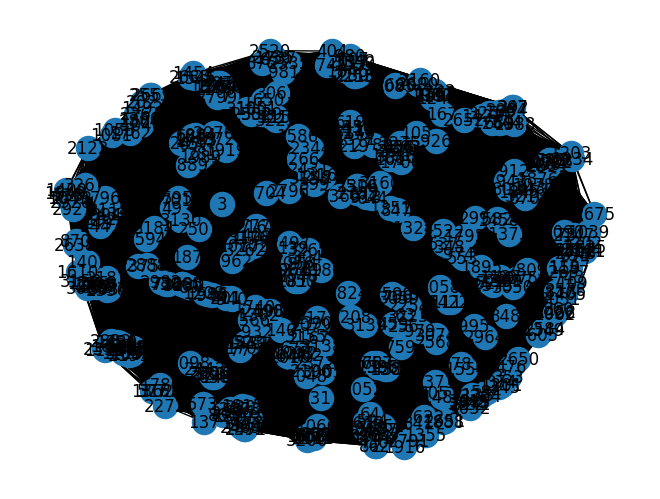

In [117]:
nx.draw(PH8, with_labels=True)
print("Nodes: ", PH8.number_of_nodes())
print("Edges: ", PH8.number_of_edges())

In [244]:
x=8
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  424.000000  424.000000    424.000000   424.000000  321.000000   
mean     8.441959  199.150637  21169.007254     7.054283  333.122623   
std      0.287619   31.652981   8482.937931     1.660062   40.230698   
min      8.000776  107.383327   2552.962804     2.458609  129.000000   
25%      8.183833  182.064029  15074.341499     6.124116  312.931022   
50%      8.403514  200.624937  20177.500857     7.078203  334.053693   
75%      8.681146  218.228008  27046.225811     8.047349  356.304825   
max      8.999499  284.098352  56488.672413    13.127000  460.107069   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    424.000000      424.000000       401.000000  424.000000  424.000000  
mean     428.833748       14.456714        66.648593    3.858594    0.363208  
std       80.753798        3.219035        16.360853    0.778034    0.481492  
min      258.880209        4.966862        16.291505    1.844372    0.000000  
25%      369.026076       12.401343        55.586815    3.332828    0.000000  
50%      420.804772       14.516947        66.612984    3.829310    0.000000  
75%      480.533031       16.819125        77.671337    4.408623    1.000000  
max      753.342620       23.042376       114.208671    5.992325    1.000000

### PH 9

In [118]:
PH9 = nx.Graph()
x=9
# Add nodes to the graph
PH9.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH9, data.to_dict('index'))

#Remove nodes
for node in list(PH9.nodes()):
    if 'ph' in PH9.nodes[node] and (PH9.nodes[node]['ph'] < x or PH9.nodes[node]['ph'] >= x+1):
        PH9.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH9.add_edge(i, j)

Nodes:  203
Edges:  20503


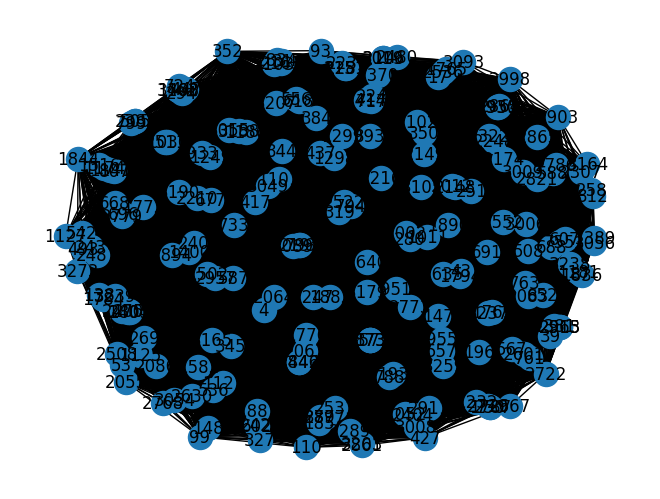

In [119]:
nx.draw(PH9, with_labels=True)
print("Nodes: ", PH9.number_of_nodes())
print("Edges: ", PH9.number_of_edges())

In [245]:
x=9
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  203.000000  203.000000    203.000000   203.000000  155.000000   
mean     9.435006  199.331161  21661.293429     6.918293  332.840492   
std      0.294242   40.987487   9908.366463     1.593817   41.924284   
min      9.001823   73.492234   3773.281147     2.102691  219.553437   
25%      9.161043  169.167106  14391.856885     5.997567  304.548029   
50%      9.406326  203.252613  20226.287945     6.850200  331.338739   
75%      9.667725  224.785544  27635.182504     7.788461  360.148291   
max      9.999807  317.338124  56351.396304    12.227175  444.970552   

       Conductivity  Organic_carbon  Trihalomethanes   Turbidity  Potability  
count    203.000000      203.000000       192.000000  203.000000  203.000000  
mean     431.427546       14.141264        66.671602    3.954923    0.374384  
std       75.273847        3.200062        16.454267    0.770751    0.485160  
min      259.636803        5.196717        18.101222    1.872573    0.000000  
25%      378.497968       12.043002        55.677490    3.389417    0.000000  
50%      428.906432       13.911645        65.404261    3.985251    0.000000  
75%      485.538215       16.158180        77.805102    4.498637    1.000000  
max      620.981006       23.917601       112.622733    5.661984    1.000000

### PH 10

In [120]:
PH10 = nx.Graph()
x=10
# Add nodes to the graph
PH10.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH10, data.to_dict('index'))

#Remove nodes
for node in list(PH10.nodes()):
    if 'ph' in PH10.nodes[node] and (PH10.nodes[node]['ph'] < x or PH10.nodes[node]['ph'] >= x+1):
        PH10.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH10.add_edge(i, j)

Nodes:  79
Edges:  3081


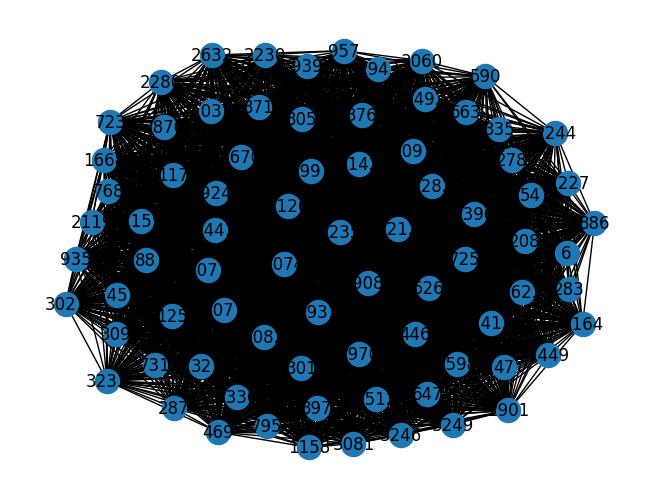

In [121]:
nx.draw(PH10, with_labels=True)
print("Nodes: ", PH10.number_of_nodes())
print("Edges: ", PH10.number_of_edges())

In [246]:
x=10
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  79.000000   79.000000     79.000000    79.000000   63.000000   
mean   10.398998  196.757333  20412.401719     7.142401  341.068923   
std     0.265569   45.208649   9707.365456     1.957263   39.550349   
min    10.003301   81.710895   5232.913254     2.785718  269.646656   
25%    10.195539  166.600864  13294.397882     5.813960  311.622204   
50%    10.337671  198.596751  18413.096820     7.279137  336.972950   
75%    10.579658  222.647809  27053.119266     8.292957  366.582299   
max    10.947473  300.292476  48621.563952    12.912187  442.761428   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count     79.000000       79.000000        73.000000  79.000000   79.000000  
mean     436.808847       14.838163        66.668141   4.027771    0.291139  
std       90.051511        3.031480        14.054739   0.742591    0.457190  
min      279.165436        5.188466        28.770619   2.672989    0.000000  
25%      369.126522       13.248014        59.576040   3.502623    0.000000  
50%      416.641081       14.977233        66.367503   3.964450    0.000000  
75%      491.861593       17.161167        75.343364   4.566380    1.000000  
max      674.443476       21.520593        92.892178   5.771715    1.000000

### PH 11

In [122]:
PH11 = nx.Graph()
x=11
# Add nodes to the graph
PH11.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH11, data.to_dict('index'))

#Remove nodes
for node in list(PH11.nodes()):
    if 'ph' in PH11.nodes[node] and (PH11.nodes[node]['ph'] < x or PH11.nodes[node]['ph'] >= x+1):
        PH11.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH11.add_edge(i, j)

Nodes:  20
Edges:  190


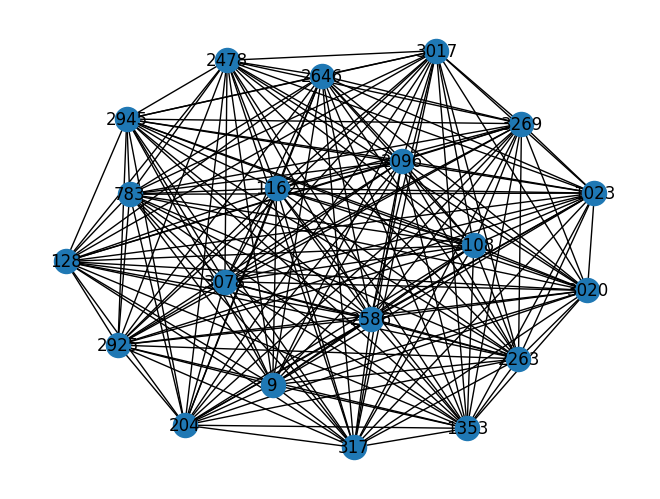

In [214]:
nx.draw(PH11, with_labels=True)
print("Nodes: ", PH11.number_of_nodes())
print("Edges: ", PH11.number_of_edges())

In [247]:
x=11
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count  20.000000   20.000000     20.000000    20.000000   13.000000   
mean   11.407282  192.750454  21925.503373     7.254885  327.827775   
std     0.241900   51.068786  12845.758892     1.728394   45.695009   
min    11.027880   77.459586   4111.785432     3.074316  235.995461   
25%    11.231353  173.558060  12931.915254     6.395215  319.354039   
50%    11.420141  189.788548  16841.783916     7.325998  327.650960   
75%    11.541953  228.174720  34627.036801     8.603680  341.029600   
max    11.907740  298.098679  43536.020874     9.899637  404.041635   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count     20.000000       20.000000        20.000000  20.000000   20.000000  
mean     425.466084       15.106098        63.325499   4.055119    0.200000  
std       79.190422        3.508600        18.134574   0.938891    0.410391  
min      260.531758        8.033859        25.525267   2.277359    0.000000  
25%      372.094409       12.343344        55.080058   3.265249    0.000000  
50%      429.672025       15.645657        63.949027   4.166122    0.000000  
75%      481.483849       17.629096        70.296323   4.911683    0.000000  
max      563.885481       21.632385       110.739299   5.749586    1.000000

### PH 12

In [124]:
PH12 = nx.Graph()
x=12
# Add nodes to the graph
PH12.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH12, data.to_dict('index'))

#Remove nodes
for node in list(PH12.nodes()):
    if 'ph' in PH12.nodes[node] and (PH12.nodes[node]['ph'] < x or PH12.nodes[node]['ph'] >= x+1):
        PH12.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                PH12.add_edge(i, j)

Nodes:  1
Edges:  0


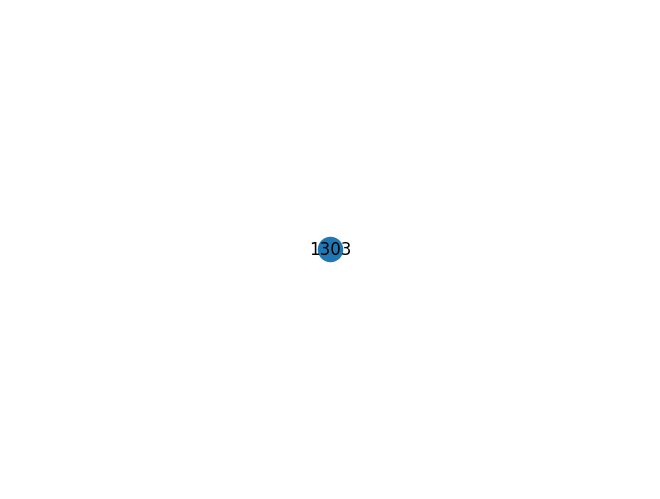

In [125]:
nx.draw(PH12, with_labels=True)
print("Nodes: ", PH12.number_of_nodes())
print("Edges: ", PH12.number_of_edges())

In [248]:
x=12
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count   1.000000    1.000000      1.000000      1.00000    1.000000   
mean   12.246928  217.368014  11318.140563      8.46516  375.894758   
std          NaN         NaN           NaN          NaN         NaN   
min    12.246928  217.368014  11318.140563      8.46516  375.894758   
25%    12.246928  217.368014  11318.140563      8.46516  375.894758   
50%    12.246928  217.368014  11318.140563      8.46516  375.894758   
75%    12.246928  217.368014  11318.140563      8.46516  375.894758   
max    12.246928  217.368014  11318.140563      8.46516  375.894758   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count      1.000000        1.000000         1.000000   1.000000         1.0  
mean     347.653054        9.762505        73.832405   3.533243         0.0  
std             NaN             NaN              NaN        NaN         NaN  
min      347.653054        9.762505        73.832405   3.533243         0.0  
25%      347.653054        9.762505        73.832405   3.533243         0.0  
50%      347.653054        9.762505        73.832405   3.533243         0.0  
75%      347.653054        9.762505        73.832405   3.533243         0.0  
max      347.653054        9.762505        73.832405   3.533243         0.0

### PH 13

In [172]:
PH13 = nx.Graph()
x=13
# Add nodes to the graph
PH13.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH13, data.to_dict('index'))

#Remove nodes
for node in list(PH13.nodes()):
    if 'ph' in PH13.nodes[node] and (PH13.nodes[node]['ph'] < x or PH13.nodes[node]['ph'] >= x+0.9):
       PH13.remove_node(node)

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
   for j, other_row in data.iterrows():
      if ((i>j) and (row['ph']>=x and row['ph']<x+0.9) and (other_row['ph']>=x and other_row['ph']<x+0.89)):
               PH13.add_edge(i, j)

Nodes:  3
Edges:  3


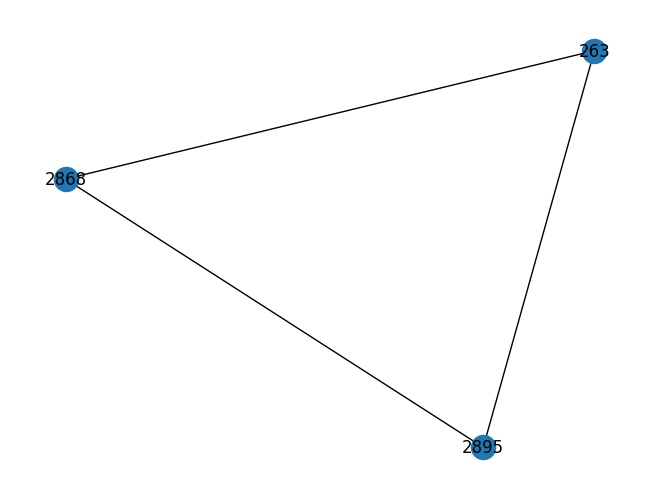

In [173]:
nx.draw(PH13, with_labels=True)
print("Nodes: ", PH13.number_of_nodes())
print("Edges: ", PH13.number_of_edges())

In [249]:
x=13
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness        Solids  Chloramines     Sulfate  \
count   4.000000    4.000000      4.000000     4.000000    3.000000   
mean   13.516633  155.873176  18796.938816     7.004019  363.703032   
std     0.355196   79.884967   4312.136238     1.370992   25.151861   
min    13.175402   47.432000  13475.912773     5.635029  334.864070   
25%    13.306267  126.440342  17217.653774     6.447237  355.005692   
50%    13.445564  170.191624  18851.425226     6.737014  375.147315   
75%    13.655930  199.624458  20430.710267     7.293796  378.122513   
max    14.000000  235.677458  24008.992040     8.907020  381.097711   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count      4.000000        4.000000         3.000000   4.000000        4.00  
mean     455.775513       14.467916        77.730517   3.334546        0.25  
std       36.550642        2.205565         7.105275   0.659993        0.50  
min      411.264465       12.083896        72.859468   2.531075        0.00  
25%      440.950893       13.110377        73.654013   3.011014        0.00  
50%      455.795818       14.297602        74.448559   3.350092        0.00  
75%      470.620438       15.655142        80.166041   3.673624        0.25  
max      500.245952       17.192564        85.883523   4.106924        1.00

### PH 14

In [162]:
PH14 = nx.Graph()
x=13.99
# Add nodes to the graph
PH14.add_nodes_from(data.index.tolist())
nx.set_node_attributes(PH14, data.to_dict('index'))

#Remove nodes
for node in list(PH14.nodes()):
    if 'ph' in PH14.nodes[node] and (PH14.nodes[node]['ph'] < x or PH14.nodes[node]['ph'] >= x+1):
        PH14.remove_node(node)
len(PH14)
# Add edges between nodes with the same "ph" value
#for i, row in data.iterrows():
 #   for j, other_row in data.iterrows():
  #      if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
   #             PH14.add_edge(i, j)

1

Nodes:  1
Edges:  0


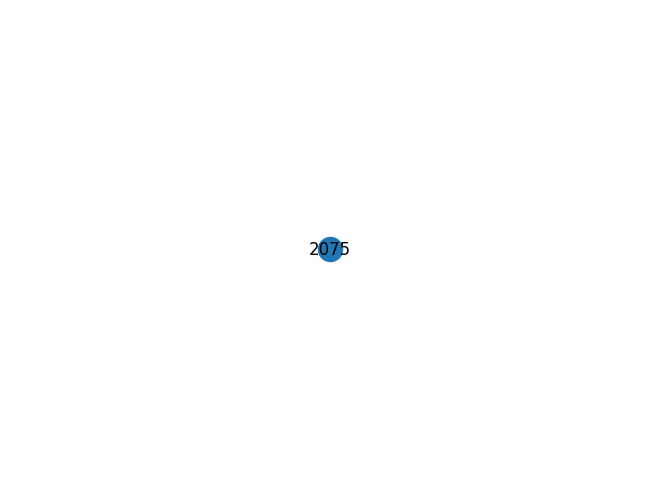

In [163]:
nx.draw(PH14, with_labels=True)
print("Nodes: ", PH14.number_of_nodes())
print("Edges: ", PH14.number_of_edges())

In [251]:
x=13.9
df_subset = data[((data['ph'] >= x) & (data['ph'] < x+1) )]
df_subset.describe()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
count   1.0    1.000000      1.00000     1.000000    1.000000      1.000000   
mean   14.0  235.677458  24008.99204     5.635029  381.097711    460.745267   
std     NaN         NaN          NaN          NaN         NaN           NaN   
min    14.0  235.677458  24008.99204     5.635029  381.097711    460.745267   
25%    14.0  235.677458  24008.99204     5.635029  381.097711    460.745267   
50%    14.0  235.677458  24008.99204     5.635029  381.097711    460.745267   
75%    14.0  235.677458  24008.99204     5.635029  381.097711    460.745267   
max    14.0  235.677458  24008.99204     5.635029  381.097711    460.745267   

       Organic_carbon  Trihalomethanes  Turbidity  Potability  
count        1.000000         1.000000   1.000000         1.0  
mean        13.452538        72.859468   3.170994         0.0  
std               NaN              NaN        NaN         NaN  
min         13.452538        72.859468   3.170994         0.0  
25%         13.452538        72.859468   3.170994         0.0  
50%         13.452538        72.859468   3.170994         0.0  
75%         13.452538        72.859468   3.170994         0.0  
max         13.452538        72.859468   3.170994         0.0

### Similarity between the graphs

As we can see there's no similarity between the graphs

In [213]:
import networkx as nx

def jaccard_distance(G1, G2):
    # Compute the union of the two graphs
    union = nx.union(G1, G2)
    print("union: ",union )
    
    # Compute the intersection of the two graphs
    intersection = nx.intersection(G1, G2)
    print("intersection: ",intersection )
    
    # Compute the Jaccard distance
    jaccard_dist = 1 - (len(intersection.edges()) / len(union.edges()))
    
    return jaccard_dist

for i in range (1, 14):
    for j in range (1,14):
        jaccard_dist = jaccard_distance(PH1, PH5)
        print("Jaccard distance between ph ", i, " and ",j, jaccard_dist)

union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  1 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  2 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  3 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  4 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  5 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  6 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Graph with 0 nodes and 0 edges
Jaccard distance between ph  1  and  7 1.0
union:  Graph with 403 nodes and 79407 edges
intersection:  Gr

### Prediction

In [228]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [231]:

# Assuming 'data' is your dataset and 'potability' is the target variable
# Replace X with your features and y with your target variable
X = data.drop(columns=['Potability'])
y = data['Potability']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_dt = decision_tree.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)


Decision Tree Accuracy: 0.581025641025641
Decision Tree Confusion Matrix:
[[772 402]
 [415 361]]
Random Forest Accuracy: 0.64
Random Forest Confusion Matrix:
[[979 195]
 [507 269]]
